**DHL Supply Chain Project**

# Introduction

The project consists of modeling and providing a computational solution to the **DHL Supply Chain** case written by Singfat Chu and David Ringrose. The degradation of the environment has led many governments and customers to pressure businesses to make their operations more nature friendly. This case illustrates an effective example of corporate social responsibility. Specifically, it demonstrates how a small increase in a supply chain budget can drastically reduce carbon dioxide ($CO_2$) emission in the transportation of LCD TVs from their manufacturing bases to a distribution centre.

The goal of this project is to make a recommendation for the company and provide a report including a plan about how the company can reduce CO2 emissions without raising the supply chain budget too much.

This project uses Gurobi API in Phyton to perform linear programming formulation. The linear programming is formulated such that it minimizes the $CO_2$ emission while satisfying the budget constraint and other constraints in this project.

## Problem

The company had a list of seven ODMs to which it could subcontract the production of LCD TV sets according to their availability and proces. ODM1 and ODM2 were the only company that could produce both LCD 32" and LCD 42". The remaining five ODMs produced LCD 42" exclusively. To engender economics of scale in the productino, the CEC guaranteed a minimum order of 200,000 to any selected ODMs. Also to mitigate dependency risk on any ODM, the maximum order for either LCD 32" and LCD 42" was capped at 600,000 units. ODM1 and ODM2 each had the ability to produce 600,000 units of LCD 32", as well as 600,000 units of LCD 42"

Several transportation were available to shop the TV sets from the ODMs to the DC: regular air, air express, road, road LTL (less than truckload), road network, rail, and water. The distances from the ODMs to the DC, and various shipping rate are tabulated in the data sheet, which you will see later on. Across shipping modes, the rate of carbon emission varied greatly from as high as 1.44 (regular air or air express) to 0.007 (water) kilogram (kg) per ton shipped per kilometer (km) travelled. Each LCD 32" weighed about 16.5 kgs and each LCD 42" weighed about 22 kgs.

Shipping times varied from two days (via air express) to 10 days(via water). DHL supply chain had to ship a minimum number of 32" and 42" LCD TV sets, according to the table displayed later.

We want to find out the potential reduction in $CO_2$ emission made possible through a potential **CNY 3.3 billion budget** for manufacturing and shipping the TVs from the ODMs to the DC

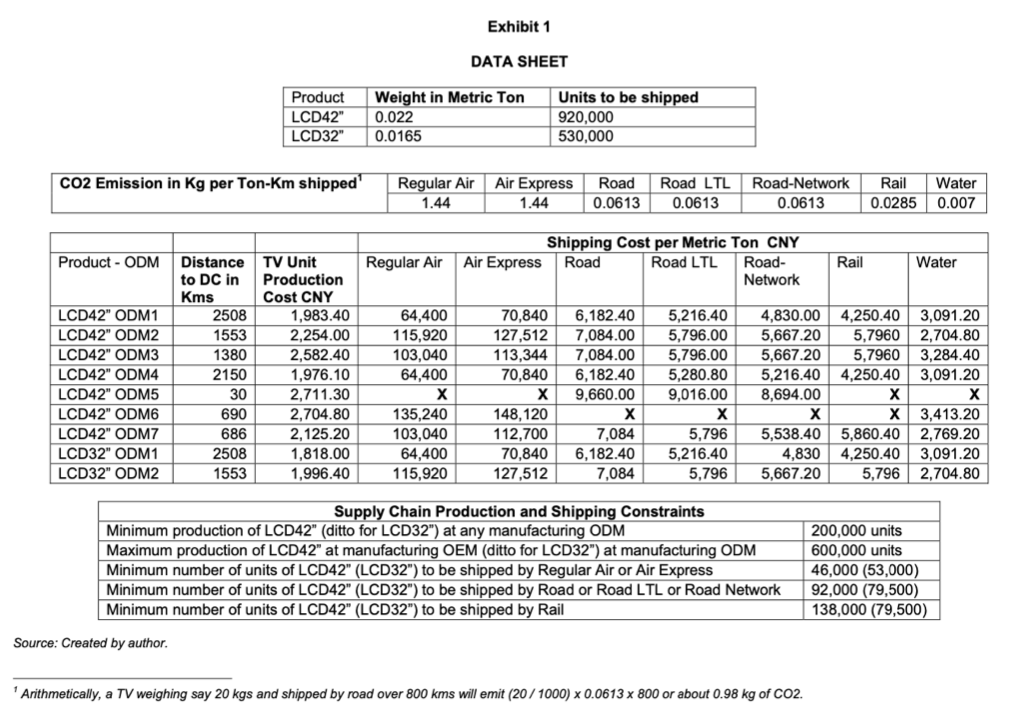

# Linear Programming Formulation

In [1]:
%pip install gurobipy

In [2]:
import pandas as pd
import numpy as np

import gurobipy as gp
from gurobipy import GRB

Our goal is to minimize $CO_2$ gas. For this to happen, we need to following formulation.

## **Index definitions**

- The list $I$ constains the type of the LCD: LCD 32" and LCD 42". 
- The list $J$ constains the #ODM: ODM1, ODM2, ... , ODM 7.
- The list $K$ contains the mode of transportation: Regular air, Air Express, etc.
- $i \in I$: index and set of LCD. The LCD $i$ belongs to LCDs $I$. LCD 32" $(i=1)$ and LCD 42" $(i=2)$.
- $j \in J$: index and set of ODM. The ODM $j$ belongs to ODMs $J$. ODM1 $(j=1)$, ODM2 $(j=2)$, and so on.
- $k \in K$: index and set of mode of transportation. The mode of transportation $k$ belongs to mode of transportations $K$. Regular air $(k=1)$, Air Express $(k=2)$, and so forth.

In [3]:
# Index definitions

I = ['LCD 32', 'LCD 42']
J = ['ODM 1','ODM 2','ODM 3','ODM 4','ODM 5','ODM 6','ODM 7']
K = ['Regular Air','Air Express','Road','Road LTL','Road-Network','Rail','Water']

## **Parameter**

- $c_{ijk}$: $CO_2$ Emission in kg per ton_km shipped for all $i,j,k$.
- $d_{ijk}$: Distance from ODM $j$ to DC in km for all $i,k$.
- $w_{ijk}$: Weight of the LCD $i$ in Metric ton for all $j,k$.
- $p_{ijk}$: LCD $i$ production cost of production from ODM $j$ for all $k$.
- $s_{ijk}$: Shipping cost per Metric Ton CNY from ODM $j$ using mode of transportation $k$ for all $i$.

In [4]:
# Let M be a very big number. If the shipping cost is equal to M, 
# then it is impossible to use that particular shipping method

M = 10**9

In [5]:
c, c_cost = gp.multidict({
          ('LCD 32','ODM 1','Regular Air'):1.44,
          ('LCD 32','ODM 1','Air Express'):1.44,
          ('LCD 32','ODM 1','Road'):0.0613,
          ('LCD 32','ODM 1','Road LTL'):0.0613,
          ('LCD 32','ODM 1','Road-Network'):0.0613,
          ('LCD 32','ODM 1','Rail'):0.0285,
          ('LCD 32','ODM 1','Water'):0.007,
          ('LCD 32','ODM 2','Regular Air'):1.44,
          ('LCD 32','ODM 2','Air Express'):1.44,
          ('LCD 32','ODM 2','Road'):0.0613,
          ('LCD 32','ODM 2','Road LTL'):0.0613,
          ('LCD 32','ODM 2','Road-Network'):0.0613,
          ('LCD 32','ODM 2','Rail'):0.0285,
          ('LCD 32','ODM 2','Water'):0.007,
          ('LCD 42','ODM 1','Regular Air'):1.44,
          ('LCD 42','ODM 1','Air Express'):1.44,
          ('LCD 42','ODM 1','Road'):0.0613,
          ('LCD 42','ODM 1','Road LTL'):0.0613,
          ('LCD 42','ODM 1','Road-Network'):0.0613,
          ('LCD 42','ODM 1','Rail'):0.0285,
          ('LCD 42','ODM 1','Water'):0.007,
          ('LCD 42','ODM 2','Regular Air'):1.44,
          ('LCD 42','ODM 2','Air Express'):1.44,
          ('LCD 42','ODM 2','Road'):0.0613,
          ('LCD 42','ODM 2','Road LTL'):0.0613,
          ('LCD 42','ODM 2','Road-Network'):0.0613,
          ('LCD 42','ODM 2','Rail'):0.0285,
          ('LCD 42','ODM 2','Water'):0.007,
          ('LCD 42','ODM 3','Regular Air'):1.44,
          ('LCD 42','ODM 3','Air Express'):1.44,
          ('LCD 42','ODM 3','Road'):0.0613,
          ('LCD 42','ODM 3','Road LTL'):0.0613,
          ('LCD 42','ODM 3','Road-Network'):0.0613,
          ('LCD 42','ODM 3','Rail'):0.0285,
          ('LCD 42','ODM 3','Water'):0.007,
          ('LCD 42','ODM 4','Regular Air'):1.44,
          ('LCD 42','ODM 4','Air Express'):1.44,
          ('LCD 42','ODM 4','Road'):0.0613,
          ('LCD 42','ODM 4','Road LTL'):0.0613,
          ('LCD 42','ODM 4','Road-Network'):0.0613,
          ('LCD 42','ODM 4','Rail'):0.0285,
          ('LCD 42','ODM 4','Water'):0.007,
          ('LCD 42','ODM 5','Regular Air'):1.44,
          ('LCD 42','ODM 5','Air Express'):1.44,
          ('LCD 42','ODM 5','Road'):0.0613,
          ('LCD 42','ODM 5','Road LTL'):0.0613,
          ('LCD 42','ODM 5','Road-Network'):0.0613,
          ('LCD 42','ODM 5','Rail'):0.0285,
          ('LCD 42','ODM 5','Water'):0.007,
          ('LCD 42','ODM 6','Regular Air'):1.44,
          ('LCD 42','ODM 6','Air Express'):1.44,
          ('LCD 42','ODM 6','Road'):0.0613,
          ('LCD 42','ODM 6','Road LTL'):0.0613,
          ('LCD 42','ODM 6','Road-Network'):0.0613,
          ('LCD 42','ODM 6','Rail'):0.0285,
          ('LCD 42','ODM 6','Water'):0.007,
          ('LCD 42','ODM 7','Regular Air'):1.44,
          ('LCD 42','ODM 7','Air Express'):1.44,
          ('LCD 42','ODM 7','Road'):0.0613,
          ('LCD 42','ODM 7','Road LTL'):0.0613,
          ('LCD 42','ODM 7','Road-Network'):0.0613,
          ('LCD 42','ODM 7','Rail'):0.0285,
          ('LCD 42','ODM 7','Water'):0.007
})

d, d_cost = gp.multidict({
          ('LCD 32','ODM 1','Regular Air'):2508,
          ('LCD 32','ODM 2','Regular Air'):1553,
          ('LCD 32','ODM 1','Air Express'):2508,
          ('LCD 32','ODM 2','Air Express'):1553,
          ('LCD 32','ODM 1','Road'):2508,
          ('LCD 32','ODM 2','Road'):1553,
          ('LCD 32','ODM 1','Road LTL'):2508,
          ('LCD 32','ODM 2','Road LTL'):1553,
          ('LCD 32','ODM 1','Road-Network'):2508,
          ('LCD 32','ODM 2','Road-Network'):1553,
          ('LCD 32','ODM 1','Rail'):2508,
          ('LCD 32','ODM 2','Rail'):1553,
          ('LCD 32','ODM 1','Water'):2508,
          ('LCD 32','ODM 2','Water'):1553,
          ('LCD 42','ODM 1','Regular Air'):2508,
          ('LCD 42','ODM 2','Regular Air'):1553,
          ('LCD 42','ODM 3','Regular Air'):1380,
          ('LCD 42','ODM 4','Regular Air'):2150,
          ('LCD 42','ODM 5','Regular Air'):30,
          ('LCD 42','ODM 6','Regular Air'):690,
          ('LCD 42','ODM 7','Regular Air'):686,
          ('LCD 42','ODM 1','Air Express'):2508,
          ('LCD 42','ODM 2','Air Express'):1553,
          ('LCD 42','ODM 3','Air Express'):1380,
          ('LCD 42','ODM 4','Air Express'):2150,
          ('LCD 42','ODM 5','Air Express'):30,
          ('LCD 42','ODM 6','Air Express'):690,
          ('LCD 42','ODM 7','Air Express'):686,
          ('LCD 42','ODM 1','Road'):2508,
          ('LCD 42','ODM 2','Road'):1553,
          ('LCD 42','ODM 3','Road'):1380,
          ('LCD 42','ODM 4','Road'):2150,
          ('LCD 42','ODM 5','Road'):30,
          ('LCD 42','ODM 6','Road'):690,
          ('LCD 42','ODM 7','Road'):686,
          ('LCD 42','ODM 1','Road LTL'):2508,
          ('LCD 42','ODM 2','Road LTL'):1553,
          ('LCD 42','ODM 3','Road LTL'):1380,
          ('LCD 42','ODM 4','Road LTL'):2150,
          ('LCD 42','ODM 5','Road LTL'):30,
          ('LCD 42','ODM 6','Road LTL'):690,
          ('LCD 42','ODM 7','Road LTL'):686,
          ('LCD 42','ODM 1','Road-Network'):2508,
          ('LCD 42','ODM 2','Road-Network'):1553,
          ('LCD 42','ODM 3','Road-Network'):1380,
          ('LCD 42','ODM 4','Road-Network'):2150,
          ('LCD 42','ODM 5','Road-Network'):30,
          ('LCD 42','ODM 6','Road-Network'):690,
          ('LCD 42','ODM 7','Road-Network'):686,
          ('LCD 42','ODM 1','Rail'):2508,
          ('LCD 42','ODM 2','Rail'):1553,
          ('LCD 42','ODM 3','Rail'):1380,
          ('LCD 42','ODM 4','Rail'):2150,
          ('LCD 42','ODM 5','Rail'):30,
          ('LCD 42','ODM 6','Rail'):690,
          ('LCD 42','ODM 7','Rail'):686,
          ('LCD 42','ODM 1','Water'):2508,
          ('LCD 42','ODM 2','Water'):1553,
          ('LCD 42','ODM 3','Water'):1380,
          ('LCD 42','ODM 4','Water'):2150,
          ('LCD 42','ODM 5','Water'):30,
          ('LCD 42','ODM 6','Water'):690,
          ('LCD 42','ODM 7','Water'):686
})

w,w_cost = gp.multidict({
          ('LCD 32','ODM 1','Regular Air'):0.0165,
          ('LCD 32','ODM 2','Regular Air'):0.0165,
          ('LCD 32','ODM 1','Air Express'):0.0165,
          ('LCD 32','ODM 2','Air Express'):0.0165,
          ('LCD 32','ODM 1','Road'):0.0165,
          ('LCD 32','ODM 2','Road'):0.0165,
          ('LCD 32','ODM 1','Road LTL'):0.0165,
          ('LCD 32','ODM 2','Road LTL'):0.0165,
          ('LCD 32','ODM 1','Road-Network'):0.0165,
          ('LCD 32','ODM 2','Road-Network'):0.0165,
          ('LCD 32','ODM 1','Rail'):0.0165,
          ('LCD 32','ODM 2','Rail'):0.0165,
          ('LCD 32','ODM 1','Water'):0.0165,
          ('LCD 32','ODM 2','Water'):0.0165,
          ('LCD 42','ODM 1','Regular Air'):0.022,
          ('LCD 42','ODM 2','Regular Air'):0.022,
          ('LCD 42','ODM 3','Regular Air'):0.022,
          ('LCD 42','ODM 4','Regular Air'):0.022,
          ('LCD 42','ODM 5','Regular Air'):0.022,
          ('LCD 42','ODM 6','Regular Air'):0.022,
          ('LCD 42','ODM 7','Regular Air'):0.022,
          ('LCD 42','ODM 1','Air Express'):0.022,
          ('LCD 42','ODM 2','Air Express'):0.022,
          ('LCD 42','ODM 3','Air Express'):0.022,
          ('LCD 42','ODM 4','Air Express'):0.022,
          ('LCD 42','ODM 5','Air Express'):0.022,
          ('LCD 42','ODM 6','Air Express'):0.022,
          ('LCD 42','ODM 7','Air Express'):0.022,
          ('LCD 42','ODM 1','Road'):0.022,
          ('LCD 42','ODM 2','Road'):0.022,
          ('LCD 42','ODM 3','Road'):0.022,
          ('LCD 42','ODM 4','Road'):0.022,
          ('LCD 42','ODM 5','Road'):0.022,
          ('LCD 42','ODM 6','Road'):0.022,
          ('LCD 42','ODM 7','Road'):0.022,
          ('LCD 42','ODM 1','Road LTL'):0.022,
          ('LCD 42','ODM 2','Road LTL'):0.022,
          ('LCD 42','ODM 3','Road LTL'):0.022,
          ('LCD 42','ODM 4','Road LTL'):0.022,
          ('LCD 42','ODM 5','Road LTL'):0.022,
          ('LCD 42','ODM 6','Road LTL'):0.022,
          ('LCD 42','ODM 7','Road LTL'):0.022,
          ('LCD 42','ODM 1','Road-Network'):0.022,
          ('LCD 42','ODM 2','Road-Network'):0.022,
          ('LCD 42','ODM 3','Road-Network'):0.022,
          ('LCD 42','ODM 4','Road-Network'):0.022,
          ('LCD 42','ODM 5','Road-Network'):0.022,
          ('LCD 42','ODM 6','Road-Network'):0.022,
          ('LCD 42','ODM 7','Road-Network'):0.022,
          ('LCD 42','ODM 1','Rail'):0.022,
          ('LCD 42','ODM 2','Rail'):0.022,
          ('LCD 42','ODM 3','Rail'):0.022,
          ('LCD 42','ODM 4','Rail'):0.022,
          ('LCD 42','ODM 5','Rail'):0.022,
          ('LCD 42','ODM 6','Rail'):0.022,
          ('LCD 42','ODM 7','Rail'):0.022,
          ('LCD 42','ODM 1','Water'):0.022,
          ('LCD 42','ODM 2','Water'):0.022,
          ('LCD 42','ODM 3','Water'):0.022,
          ('LCD 42','ODM 4','Water'):0.022,
          ('LCD 42','ODM 5','Water'):0.022,
          ('LCD 42','ODM 6','Water'):0.022,
          ('LCD 42','ODM 7','Water'):0.022
          })

p,p_cost = gp.multidict({
    ('LCD 32','ODM 1','Regular Air'):1818.00,
    ('LCD 32','ODM 1','Air Express'):1818.00,
    ('LCD 32','ODM 1','Road'):1818.00,
    ('LCD 32','ODM 1','Road LTL'):1818.00,
    ('LCD 32','ODM 1','Road-Network'):1818.00,
    ('LCD 32','ODM 1','Rail'):1818.00,
    ('LCD 32','ODM 1','Water'):1818.00,
    ('LCD 32','ODM 2','Regular Air'):1996.40,
    ('LCD 32','ODM 2','Air Express'):1996.40,
    ('LCD 32','ODM 2','Road'):1996.40,
    ('LCD 32','ODM 2','Road LTL'):1996.40,
    ('LCD 32','ODM 2','Road-Network'):1996.40,
    ('LCD 32','ODM 2','Rail'):1996.40,
    ('LCD 32','ODM 2','Water'):1996.40,
    ('LCD 42','ODM 1','Regular Air'):1983.40,
    ('LCD 42','ODM 1','Air Express'):1983.40,
    ('LCD 42','ODM 1','Road'):1983.40,
    ('LCD 42','ODM 1','Road LTL'):1983.40,
    ('LCD 42','ODM 1','Road-Network'):1983.40,
    ('LCD 42','ODM 1','Rail'):1983.40,
    ('LCD 42','ODM 1','Water'):1983.40,
    ('LCD 42','ODM 2','Regular Air'):2254.00,
    ('LCD 42','ODM 2','Air Express'):2254.00,
    ('LCD 42','ODM 2','Road'):2254.00,
    ('LCD 42','ODM 2','Road LTL'):2254.00,
    ('LCD 42','ODM 2','Road-Network'):2254.00,
    ('LCD 42','ODM 2','Rail'):2254.00,
    ('LCD 42','ODM 2','Water'):2254.00,
    ('LCD 42','ODM 3','Regular Air'):2582.40,
    ('LCD 42','ODM 3','Air Express'):2582.40,
    ('LCD 42','ODM 3','Road'):2582.40,
    ('LCD 42','ODM 3','Road LTL'):2582.40,
    ('LCD 42','ODM 3','Road-Network'):2582.40,
    ('LCD 42','ODM 3','Rail'):2582.40,
    ('LCD 42','ODM 3','Water'):2582.40,
    ('LCD 42','ODM 4','Regular Air'):1976.10,
    ('LCD 42','ODM 4','Air Express'):1976.10,
    ('LCD 42','ODM 4','Road'):1976.10,
    ('LCD 42','ODM 4','Road LTL'):1976.10,
    ('LCD 42','ODM 4','Road-Network'):1976.10,
    ('LCD 42','ODM 4','Rail'):1976.10,
    ('LCD 42','ODM 4','Water'):1976.10,
    ('LCD 42','ODM 5','Regular Air'):2711.30,
    ('LCD 42','ODM 5','Air Express'):2711.30,
    ('LCD 42','ODM 5','Road'):2711.30,
    ('LCD 42','ODM 5','Road LTL'):2711.30,
    ('LCD 42','ODM 5','Road-Network'):2711.30,
    ('LCD 42','ODM 5','Rail'):2711.30,
    ('LCD 42','ODM 5','Water'):2711.30,
    ('LCD 42','ODM 6','Regular Air'):2704.80,
    ('LCD 42','ODM 6','Air Express'):2704.80,
    ('LCD 42','ODM 6','Road'):2704.80,
    ('LCD 42','ODM 6','Road LTL'):2704.80,
    ('LCD 42','ODM 6','Road-Network'):2704.80,
    ('LCD 42','ODM 6','Rail'):2704.80,
    ('LCD 42','ODM 6','Water'):2704.80,
    ('LCD 42','ODM 7','Regular Air'):2125.20,
    ('LCD 42','ODM 7','Air Express'):2125.20,
    ('LCD 42','ODM 7','Road'):2125.20,
    ('LCD 42','ODM 7','Road LTL'):2125.20,
    ('LCD 42','ODM 7','Road-Network'):2125.20,
    ('LCD 42','ODM 7','Rail'):2125.20,
    ('LCD 42','ODM 7','Water'):2125.20
})

s,s_cost = gp.multidict({
    ('LCD 32','ODM 1','Regular Air'):64400,
    ('LCD 32','ODM 1','Air Express'):70840,
    ('LCD 32','ODM 1','Road'):6182.40,
    ('LCD 32','ODM 1','Road LTL'):5216.40,
    ('LCD 32','ODM 1','Road-Network'):4830.00,
    ('LCD 32','ODM 1','Rail'):4250.40,
    ('LCD 32','ODM 1','Water'):3091.20,
    ('LCD 32','ODM 2','Regular Air'):115920,
    ('LCD 32','ODM 2','Air Express'):127512,
    ('LCD 32','ODM 2','Road'):7084,
    ('LCD 32','ODM 2','Road LTL'):5796,
    ('LCD 32','ODM 2','Road-Network'):5667.20,
    ('LCD 32','ODM 2','Rail'):5796,
    ('LCD 32','ODM 2','Water'):2704.80,
    ('LCD 42','ODM 1','Regular Air'):64400,
    ('LCD 42','ODM 1','Air Express'):70840,
    ('LCD 42','ODM 1','Road'):6182.40,
    ('LCD 42','ODM 1','Road LTL'):5216.40,
    ('LCD 42','ODM 1','Road-Network'):4830.00,
    ('LCD 42','ODM 1','Rail'):4250.40,
    ('LCD 42','ODM 1','Water'):3091.20,
    ('LCD 42','ODM 2','Regular Air'):115920,
    ('LCD 42','ODM 2','Air Express'):127512,
    ('LCD 42','ODM 2','Road'):7084,
    ('LCD 42','ODM 2','Road LTL'):5796,
    ('LCD 42','ODM 2','Road-Network'):5667.20,
    ('LCD 42','ODM 2','Rail'):5796,
    ('LCD 42','ODM 2','Water'):2704.80,
    ('LCD 42','ODM 3','Regular Air'):103040,
    ('LCD 42','ODM 3','Air Express'):113344,
    ('LCD 42','ODM 3','Road'):7084,
    ('LCD 42','ODM 3','Road LTL'):5796,
    ('LCD 42','ODM 3','Road-Network'):5667.20,
    ('LCD 42','ODM 3','Rail'):5796,
    ('LCD 42','ODM 3','Water'):3284.40,
    ('LCD 42','ODM 4','Regular Air'):64400,
    ('LCD 42','ODM 4','Air Express'):70840,
    ('LCD 42','ODM 4','Road'):6182.40,
    ('LCD 42','ODM 4','Road LTL'):5280.80,
    ('LCD 42','ODM 4','Road-Network'):5216.40,
    ('LCD 42','ODM 4','Rail'):4250.40,
    ('LCD 42','ODM 4','Water'):3091.20,
    ('LCD 42','ODM 5','Regular Air'):M,
    ('LCD 42','ODM 5','Air Express'):M,
    ('LCD 42','ODM 5','Road'):9660,
    ('LCD 42','ODM 5','Road LTL'):9016,
    ('LCD 42','ODM 5','Road-Network'):8694,
    ('LCD 42','ODM 5','Rail'):M,
    ('LCD 42','ODM 5','Water'):M,
    ('LCD 42','ODM 6','Regular Air'):135240,
    ('LCD 42','ODM 6','Air Express'):148120,
    ('LCD 42','ODM 6','Road'):M,
    ('LCD 42','ODM 6','Road LTL'):M,
    ('LCD 42','ODM 6','Road-Network'):M,
    ('LCD 42','ODM 6','Rail'):M,
    ('LCD 42','ODM 6','Water'):3413.20,
    ('LCD 42','ODM 7','Regular Air'):103040,
    ('LCD 42','ODM 7','Air Express'):112700,
    ('LCD 42','ODM 7','Road'):7084,
    ('LCD 42','ODM 7','Road LTL'):5796,
    ('LCD 42','ODM 7','Road-Network'):5538.40,
    ('LCD 42','ODM 7','Rail'):5860.40,
    ('LCD 42','ODM 7','Water'):2769.20
})

## **Decision variable**
- $x_{ijk}$: number of LCD $i$ units shipped from ODM $j$ using mode of transportation $k$

## **Objective Function**

The following constructor creates an empty ``Model`` object “m”. We specify the model name by passing the string "DHL" as an argument. The ``Model`` object “m” holds a single optimization problem. It consists of a set of variables, a set of constraints, and the objective function.

In [6]:
# Declare and initialize model
m = gp.Model('DHL')

Restricted license - for non-production use only - expires 2022-01-13


The ``Model.addVars()`` method creates the decision variables for a ``Model`` object.
This method returns a Gurobi ``tupledict`` object that contains the newly created variables. We supply the ``c`` object as the first argument to specify the variable indices. The ``name`` keyword is used to specify a name for the newly created decision variables. By default, variables are assumed to be non-negative.

In [7]:
# Create decision variables for the DHL model
x = m.addVars(c, name="x")

The objective function is formulated such that it minimizes the $CO_2$ emissions in Kg per Ton-Km shipped. 

For the objective function to be in right unit, we need the following expression:

\begin{equation}
c_{ijk} = \text{kg}/(\text{Ton*km})\\
w_{ijk} = \text{weight in ton}\\
d_{ijk} = \text{distance in km}\\
x_{ijk} = \text{units shipped}\\
\end{equation}

Thus, we need that:

$$c_{ijk}*w_{ijk}*d_{ijk}*x_{ijk} = x \hspace{0.1cm} \text{kg units of} \hspace{0.1cm} CO_2$$

We want to minimize the kg units of $CO_2$ for all $i,j,k$. Hence, our objective function will be:

\begin{equation}
\text{Minimize} \quad \sum_{k \in K} \sum_{j \in J} \sum_{i \in I} x_{ijk}(c_{ijk}w_{ijk}d_{ijk}).
\end{equation}


In [8]:
# Build a list of tuples 

ijk_32 = []
ijk_42 = []

# Tupples for LCD 32
for i in {'LCD 32'}:
  for j in {'ODM 1','ODM 2'}:
    for k in K:
      tp = i,j,k
      ijk_32.append(tp)

ijk32_tupple = gp.tuplelist(ijk_32)

# Tupples for LCD 42
for i in {'LCD 42'}:
  for j in J:
    for k in K:
      tp = i,j,k
      ijk_42.append(tp)

ijk42_tupple = gp.tuplelist(ijk_42)

# Tupples combined

ijk = (ijk_32+ijk_42)
ijk_tupple = gp.tuplelist(ijk)

In [9]:
# Formulating objective function
m.setObjective(
    gp.quicksum(x[i,j,k]*c_cost[i,j,k]*w_cost[i,j,k]*d_cost[i,j,k] 
                for i,j,k in ijk_tupple)
,GRB.MINIMIZE)

## **Constraints**

### Units to be shipped

Each of the prodicts have the units requirement to be shipped. Thus, the constraint formulation will be:

\begin{equation}
\ \quad \sum_{k \in K} \sum_{j \in J} x_{0jk} \geq 530,000
\end{equation}

\begin{equation}
\ \quad \sum_{k \in K} \sum_{j \in J} x_{1jk} \geq 920,000
\end{equation}

In [10]:
# Units to be shipped constraint when i=0

shipping_32 = m.addConstr((gp.quicksum(x[i,j,k] for i,j,k in ijk32_tupple))== 530000,
                          name = "shipping_32")

In [11]:
# Units to be shipped constraint when i=1

shipping_42 = m.addConstr((gp.quicksum(x[i,j,k] for i,j,k in ijk42_tupple))== 920000 ,
                          name = "shipping_42")

### Production

Maximum production of LCD 42" (ditto for LCD 32") at any manufacturing ODM $j$ are 200,000 and 600,000 respectively:

\begin{equation}
\ \sum_{j \in J} x_{ijk} \leq 600,000
\quad \forall i,k
\end{equation}

Note that the Minimum Production is not included in the constraint because it will generate infeasible solution.

In [12]:
# Minimum production constraint
#production_min = m.addConstrs((x.sum('*',j,'*') >= 200000 for j in J),
                         # name = "Minimum Production")

# Maximum production constraint
production_max = m.addConstrs((x.sum('*',j,'*') <= 600000 for j in J),
                          name = "Maximum Production")

### Transportation

In [13]:
# Build a list of tuples for transportation constraint

# Tupples for LCD 32 using Air
ijk_32_Air = []
for i in {'LCD 32'}:
  for j in {'ODM 1','ODM 2'}:
    for k in {'Regular Air','Air Express'}:
      tp = i,j,k
      ijk_32_Air.append(tp)

ijk32_Air_tupple = gp.tuplelist(ijk_32_Air)

# Tupples for LCD 42 using Air
ijk_42_Air = []
for i in {'LCD 42'}:
  for j in {'ODM 1','ODM 2','ODM 3','ODM 4','ODM 5','ODM 6','ODM 7'}:
    for k in {'Regular Air','Air Express'}:
      tp = i,j,k
      ijk_42_Air.append(tp)

ijk42_Air_tupple = gp.tuplelist(ijk_42_Air)

# Tupples for LCD 32 using Road
ijk_32_Road = []
for i in {'LCD 32'}:
  for j in {'ODM 1','ODM 2'}:
    for k in {'Road','Road LTL','Road-Network'}:
      tp = i,j,k
      ijk_32_Road.append(tp)

ijk32_Road_tupple = gp.tuplelist(ijk_32_Road)

# Tupples for LCD 42 using Road
ijk_42_Road = []
for i in {'LCD 42'}:
  for j in {'ODM 1','ODM 2','ODM 3','ODM 4','ODM 5','ODM 6','ODM 7'}:
    for k in {'Road','Road LTL','Road-Network'}:
      tp = i,j,k
      ijk_42_Road.append(tp)

ijk42_Road_tupple= gp.tuplelist(ijk_42_Road)

# Tupples for LCD 32 using Rail
ijk_32_Rail = []
for i in {'LCD 32'}:
  for j in {'ODM 1','ODM 2'}:
    for k in {'Rail'}:
      tp = i,j,k
      ijk_32_Rail.append(tp)

ijk32_Rail_tupple = gp.tuplelist(ijk_32_Rail)

# Tupples for LCD 42 using Rail
ijk_42_Rail = []
for i in {'LCD 42'}:
  for j in {'ODM 1','ODM 2','ODM 3','ODM 4','ODM 5','ODM 6','ODM 7'}:
    for k in {'Rail'}:
      tp = i,j,k
      ijk_42_Rail.append(tp)

ijk42_Rail_tupple= gp.tuplelist(ijk_42_Rail)

Minimum number of units of LCD 32" and LCD 42" to be shipped by Regular Air or Air Express:

\begin{equation}
\ \quad \sum_{k=1}^{2} \sum_{j=1}^{7} x_{0jk} \geq 53,000
\end{equation}

\begin{equation}
\ \quad \sum_{k=1}^{2} \sum_{j=1}^{7} x_{1jk} \geq 46,000
\end{equation}

In [14]:
trans32_air = m.addConstr((gp.quicksum(x[i,j,k] for i,j,k in ijk32_Air_tupple)) >= 53000,
                          name = "trans32_air")
trans42_air = m.addConstr((gp.quicksum(x[i,j,k] for i,j,k in ijk42_Air_tupple))>= 46000,
                          name = "trans42_air")

Minimum number of units of LCD 32" and LCD 42" to be shipped by road or Road LTL or Road Network:

\begin{equation}
\ \quad \sum_{k=3}^{5} \sum_{j=1}^{7} x_{0jk} \geq 79,500
\end{equation}

\begin{equation}
\ \quad \sum_{k=3}^{5} \sum_{j=1}^{7} x_{1jk} \geq 92,000
\end{equation}

In [15]:
trans32_road = m.addConstr((gp.quicksum(x[i,j,k] for i,j,k in ijk32_Road_tupple)) >= 79500 ,
                          name = "trans32_road")
trans42_road = m.addConstr((gp.quicksum(x[i,j,k] for i,j,k in ijk42_Road_tupple)) >= 92000,
                          name = "trans42_road")

Minimum number of units of LCD 32" and LCD 42" to be shipped by Rail:

\begin{equation}
\ \sum_{j=1}^{7} x_{0j6} \geq 79,500
\end{equation}

\begin{equation}
\ \sum_{j=1}^{7} x_{1j6} \geq 138,000
\end{equation}

In [16]:
trans32_rail = m.addConstr((gp.quicksum(x[i,j,k] for i,j,k in ijk32_Rail_tupple))>= 79500 ,
                          name = "trans32_rail")
trans42_rail = m.addConstr((gp.quicksum(x[i,j,k] for i,j,k in ijk42_Rail_tupple))>= 138000 ,
                          name = "trans42_rail")

### Budget

The budget needs to be CNY 3.3 billion:

\begin{equation}
\ \quad \sum_{k \in K} \sum_{j \in J} \sum_{i \in I} (p_{ijk}+s_{ijk}w_{ijk})x_{ijk} \leq 3.3*10^9
\end{equation}


In [17]:
budget = m.addConstr(gp.quicksum((p_cost[i,j,k]+s_cost[i,j,k]*w_cost[i,j,k])*x[i,j,k] 
                for i,j,k in ijk_tupple)<=3.3*10**9,
                name = 'budget')

## **Solving LP problem**

In [18]:
m.write('DHL.rlp')

In [19]:
m.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 16 rows, 63 columns and 243 nonzeros
Model fingerprint: 0x7b7d0c56
Coefficient statistics:
  Matrix range     [1e+00, 2e+07]
  Objective range  [5e-03, 8e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+04, 3e+09]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 0 rows and 3 columns
Presolve time: 0.03s
Presolved: 16 rows, 60 columns, 231 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.5066895e+04   1.126400e+07   0.000000e+00      0s
      13    3.4062663e+06   0.000000e+00   0.000000e+00      0s

Solved in 13 iterations and 0.05 seconds
Optimal objective  3.406266334e+06


In [20]:
# Report table
print("The amount of CO2 emitted in ton is: ",'{:,.2f}'.format( m.getAttr("ObjVal")/1000), "tons")

print("____________________________________________________________________________________")
print(f"Number of LCD 32 and LCD 42 units shipped from all ODMs using each mode of transportations is:")
print("____________________________________________________________________________________")

inv = {}
for i in {'LCD 32'}:
  for j in {'ODM 1','ODM 2'}:
    my_list = []
    for k in K:
        my_list.append('{:,.2f}'.format( x[i, j, k].x ) )
    inv[i,j] = my_list

variable_table_32 = pd.DataFrame(inv, index = K)

inv = {}
for i in {'LCD 42'}:
  for j in J:
    my_list = []
    for k in K:
        my_list.append('{:,.2f}'.format( x[i, j, k].x ) )
    inv[i,j] = my_list

variable_table_42 = pd.DataFrame(inv, index = K)

variable_table = pd.concat([variable_table_32,variable_table_42], axis = 1)
variable_table

The amount of CO2 emitted in ton is:  3,406.27 tons
____________________________________________________________________________________
Number of LCD 32 and LCD 42 units shipped from all ODMs using each mode of transportations is:
____________________________________________________________________________________


LCD 32            LCD 42  ...                             
                   ODM 1      ODM 2  ODM 1  ...      ODM 5 ODM 6       ODM 7
Regular Air         0.00  53,000.00   0.00  ...       0.00  0.00   46,000.00
Air Express         0.00       0.00   0.00  ...       0.00  0.00        0.00
Road                0.00       0.00   0.00  ...       0.00  0.00        0.00
Road LTL            0.00       0.00   0.00  ...       0.00  0.00        0.00
Road-Network        0.00  79,500.00   0.00  ...  92,000.00  0.00        0.00
Rail                0.00  79,500.00   0.00  ...       0.00  0.00  138,000.00
Water         257,625.47  60,374.53   0.00  ...       0.00  0.00  416,000.00

[7 rows x 9 columns]

## **Sensitivity Analysis**

We want to perform sensitivity analysis on the budget constraint. This will allow to investigate how a small increase in a supply chain budget can drastically reduce carbon dioxide $(CO_2)$ emission in the transportation of LCD TVs from their manufacturing bases to a distribution centre.

In [21]:
# Budget constraint slack

print(budget.getAttr("slack"))

0.0


The slack of the budget constraint is zero. The budget constraint is active. Thus, sensitivity analysis on budget constraint is feasible to be done. Next, we want to investigate the smallest and biggest right-hand side value at which the current optimal basis would remain optimal:

In [22]:
print("Lower limit of budget constraint: ",budget.getAttr('SARHSLow'))
print("Upper limit of budget constraint: ",budget.getAttr('SARHSUp'))

Lower limit of budget constraint:  3289614107.0
Upper limit of budget constraint:  3344317866.2


Thus, if the budget is not in the range stated above, then the optimal values will change. 

Before considering the $CO_2$ emission, the company would like to fulfill all constraints within the **CNY 3 billion budget**. Hence, let us try to fit the **CNY 3 billion budget** into our constraint ans see the amount of $CO_2$ emission in kg.

In [23]:
# Replacing 3.3 billion with 3 billion budget constraint

m.remove(m.getConstrs()[15])

budget = m.addConstr(gp.quicksum((p_cost[i,j,k]+s_cost[i,j,k]*w_cost[i,j,k])*x[i,j,k] 
                for i,j,k in ijk_tupple)<=3.0*10**9,
                name = 'budget')

In [24]:
m.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 16 rows, 63 columns and 243 nonzeros
Model fingerprint: 0x03bea330
Coefficient statistics:
  Matrix range     [1e+00, 2e+07]
  Objective range  [5e-03, 8e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+04, 3e+09]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 0 rows and 3 columns
Presolve time: 0.02s
Presolved: 16 rows, 60 columns, 231 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.5066895e+04   1.126400e+07   0.000000e+00      0s

Solved in 31 iterations and 0.03 seconds
Infeasible model


Unfortunately, the linear program is infeasible when the budget is 3.0 billions. Hence, let us explore how increasing the budget leads to a decrease in $CO_2$ emission by plotting a line plot, x-axis indicating the budget and y-axis indicating the emission of $CO_2$ in tons

In [25]:
import matplotlib.pyplot as plt

In [26]:
budget_list = np.arange(3.1*10**9,4.1*10**9,0.1*10**9)
emission_list = []

In [27]:
# Replacing with 3.1 billion budget constraint


m.remove(m.getConstrs()[15])

budget = m.addConstr(gp.quicksum((p_cost[i,j,k]+s_cost[i,j,k]*w_cost[i,j,k])*x[i,j,k] 
                for i,j,k in ijk_tupple)<=budget_list[0],
                name = 'budget')

m.optimize();
emission_list = m.getAttr('ObjVal')

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 16 rows, 63 columns and 243 nonzeros
Model fingerprint: 0x409194c0
Coefficient statistics:
  Matrix range     [1e+00, 2e+07]
  Objective range  [5e-03, 8e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+04, 3e+09]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 0 rows and 3 columns
Presolve time: 0.01s
Presolved: 16 rows, 60 columns, 231 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.5066895e+04   1.126400e+07   0.000000e+00      0s
      22    4.3861510e+06   0.000000e+00   0.000000e+00      0s

Solved in 22 iterations and 0.02 seconds
Optimal objective  4.386150999e+06


In [28]:
# Replacing with 3.2 billion budget constraint


m.remove(m.getConstrs()[15])

budget = m.addConstr(gp.quicksum((p_cost[i,j,k]+s_cost[i,j,k]*w_cost[i,j,k])*x[i,j,k] 
                for i,j,k in ijk_tupple)<=budget_list[1],
                name = 'budget')

m.optimize();
emission_list = np.append(emission_list,m.getAttr('ObjVal'))

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 16 rows, 63 columns and 243 nonzeros
Model fingerprint: 0x1e16d29a
Coefficient statistics:
  Matrix range     [1e+00, 2e+07]
  Objective range  [5e-03, 8e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+04, 3e+09]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 0 rows and 3 columns
Presolve time: 0.01s
Presolved: 16 rows, 60 columns, 231 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.5066895e+04   1.126400e+07   0.000000e+00      0s
      16    3.5408409e+06   0.000000e+00   0.000000e+00      0s

Solved in 16 iterations and 0.02 seconds
Optimal objective  3.540840890e+06


In [29]:
# Replacing with 3.3 billion budget constraint


m.remove(m.getConstrs()[15])

budget = m.addConstr(gp.quicksum((p_cost[i,j,k]+s_cost[i,j,k]*w_cost[i,j,k])*x[i,j,k] 
                for i,j,k in ijk_tupple)<=budget_list[2],
                name = 'budget')

m.optimize();
emission_list = np.append(emission_list,m.getAttr('ObjVal'))

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 16 rows, 63 columns and 243 nonzeros
Model fingerprint: 0x7b7d0c56
Coefficient statistics:
  Matrix range     [1e+00, 2e+07]
  Objective range  [5e-03, 8e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+04, 3e+09]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 0 rows and 3 columns
Presolve time: 0.02s
Presolved: 16 rows, 60 columns, 231 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.5066895e+04   1.126400e+07   0.000000e+00      0s
      13    3.4062663e+06   0.000000e+00   0.000000e+00      0s

Solved in 13 iterations and 0.03 seconds
Optimal objective  3.406266334e+06


In [30]:
# Replacing with 3.4 billion budget constraint


m.remove(m.getConstrs()[15])

budget = m.addConstr(gp.quicksum((p_cost[i,j,k]+s_cost[i,j,k]*w_cost[i,j,k])*x[i,j,k] 
                for i,j,k in ijk_tupple)<=budget_list[3],
                name = 'budget')

m.optimize();
emission_list = np.append(emission_list,m.getAttr('ObjVal'))

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 16 rows, 63 columns and 243 nonzeros
Model fingerprint: 0x903288fe
Coefficient statistics:
  Matrix range     [1e+00, 2e+07]
  Objective range  [5e-03, 8e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+04, 3e+09]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 0 rows and 3 columns
Presolve time: 0.02s
Presolved: 16 rows, 60 columns, 231 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.5066895e+04   1.126400e+07   0.000000e+00      0s
      13    3.3589467e+06   0.000000e+00   0.000000e+00      0s

Solved in 13 iterations and 0.03 seconds
Optimal objective  3.358946690e+06


In [31]:
# Replacing with 3.5 billion budget constraint


m.remove(m.getConstrs()[15])

budget = m.addConstr(gp.quicksum((p_cost[i,j,k]+s_cost[i,j,k]*w_cost[i,j,k])*x[i,j,k] 
                for i,j,k in ijk_tupple)<=budget_list[4],
                name = 'budget')

m.optimize();
emission_list = np.append(emission_list,m.getAttr('ObjVal'))

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 16 rows, 63 columns and 243 nonzeros
Model fingerprint: 0x2baef71b
Coefficient statistics:
  Matrix range     [1e+00, 2e+07]
  Objective range  [5e-03, 8e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+04, 4e+09]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 0 rows and 3 columns
Presolve time: 0.02s
Presolved: 16 rows, 60 columns, 231 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.5066895e+04   1.126400e+07   0.000000e+00      0s
      12    3.3250920e+06   0.000000e+00   0.000000e+00      0s

Solved in 12 iterations and 0.02 seconds
Optimal objective  3.325092016e+06


In [32]:
# Replacing with 3.6 billion budget constraint


m.remove(m.getConstrs()[15])

budget = m.addConstr(gp.quicksum((p_cost[i,j,k]+s_cost[i,j,k]*w_cost[i,j,k])*x[i,j,k] 
                for i,j,k in ijk_tupple)<=budget_list[5],
                name = 'budget')

m.optimize();
emission_list = np.append(emission_list,m.getAttr('ObjVal'))

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 16 rows, 63 columns and 243 nonzeros
Model fingerprint: 0x4ca61158
Coefficient statistics:
  Matrix range     [1e+00, 2e+07]
  Objective range  [5e-03, 8e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+04, 4e+09]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 0 rows and 3 columns
Presolve time: 0.01s
Presolved: 16 rows, 60 columns, 231 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.5066895e+04   1.126400e+07   0.000000e+00      0s
      11    3.3061284e+06   0.000000e+00   0.000000e+00      0s

Solved in 11 iterations and 0.02 seconds
Optimal objective  3.306128395e+06


In [33]:
# Replacing with 3.7 billion budget constraint


m.remove(m.getConstrs()[15])

budget = m.addConstr(gp.quicksum((p_cost[i,j,k]+s_cost[i,j,k]*w_cost[i,j,k])*x[i,j,k] 
                for i,j,k in ijk_tupple)<=budget_list[6],
                name = 'budget')

m.optimize();
emission_list = np.append(emission_list,m.getAttr('ObjVal'))

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 16 rows, 63 columns and 243 nonzeros
Model fingerprint: 0x3f20041d
Coefficient statistics:
  Matrix range     [1e+00, 2e+07]
  Objective range  [5e-03, 8e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+04, 4e+09]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 0 rows and 3 columns
Presolve time: 0.02s
Presolved: 16 rows, 60 columns, 231 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.5066895e+04   1.126400e+07   0.000000e+00      0s
      11    3.2970299e+06   0.000000e+00   0.000000e+00      0s

Solved in 11 iterations and 0.02 seconds
Optimal objective  3.297029867e+06


In [34]:
# Replacing with 3.8 billion budget constraint


m.remove(m.getConstrs()[15])

budget = m.addConstr(gp.quicksum((p_cost[i,j,k]+s_cost[i,j,k]*w_cost[i,j,k])*x[i,j,k] 
                for i,j,k in ijk_tupple)<=budget_list[7],
                name = 'budget')

m.optimize();
emission_list = np.append(emission_list,m.getAttr('ObjVal'))

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 16 rows, 63 columns and 243 nonzeros
Model fingerprint: 0x8ee848ed
Coefficient statistics:
  Matrix range     [1e+00, 2e+07]
  Objective range  [5e-03, 8e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+04, 4e+09]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 0 rows and 3 columns
Presolve time: 0.02s
Presolved: 16 rows, 60 columns, 231 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.5066895e+04   1.126400e+07   0.000000e+00      0s
      15    3.2932753e+06   0.000000e+00   0.000000e+00      0s

Solved in 15 iterations and 0.03 seconds
Optimal objective  3.293275252e+06


In [35]:
# Replacing with 3.9 billion budget constraint


m.remove(m.getConstrs()[15])

budget = m.addConstr(gp.quicksum((p_cost[i,j,k]+s_cost[i,j,k]*w_cost[i,j,k])*x[i,j,k] 
                for i,j,k in ijk_tupple)<=budget_list[8],
                name = 'budget')

m.optimize();
emission_list = np.append(emission_list,m.getAttr('ObjVal'))

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 16 rows, 63 columns and 243 nonzeros
Model fingerprint: 0xebde9ceb
Coefficient statistics:
  Matrix range     [1e+00, 2e+07]
  Objective range  [5e-03, 8e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+04, 4e+09]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 0 rows and 3 columns
Presolve time: 0.01s
Presolved: 16 rows, 60 columns, 231 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.5066895e+04   1.126400e+07   0.000000e+00      0s
      15    3.2931811e+06   0.000000e+00   0.000000e+00      0s

Solved in 15 iterations and 0.02 seconds
Optimal objective  3.293181074e+06


In [36]:
# Replacing with 4.0 billion budget constraint


m.remove(m.getConstrs()[15])

budget = m.addConstr(gp.quicksum((p_cost[i,j,k]+s_cost[i,j,k]*w_cost[i,j,k])*x[i,j,k] 
                for i,j,k in ijk_tupple)<=budget_list[9],
                name = 'budget')

m.optimize();
emission_list = np.append(emission_list,m.getAttr('ObjVal'))

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 16 rows, 63 columns and 243 nonzeros
Model fingerprint: 0x5a5d1c5b
Coefficient statistics:
  Matrix range     [1e+00, 2e+07]
  Objective range  [5e-03, 8e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e+04, 4e+09]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 0 rows and 3 columns
Presolve time: 0.02s
Presolved: 16 rows, 60 columns, 231 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.5066895e+04   1.126400e+07   0.000000e+00      0s
      15    3.2930869e+06   0.000000e+00   0.000000e+00      0s

Solved in 15 iterations and 0.04 seconds
Optimal objective  3.293086896e+06


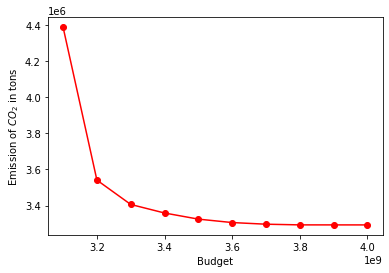

In [37]:
plt.plot(budget_list,emission_list, 'ro-')
plt.xlabel('Budget')
plt.ylabel('Emission of $CO_2$ in tons');


From the graph above, it shows how a small increase in a supply chain budget can drastically reduce carbon dioxide $CO_2$ emission in the transportation of LCD TVs from their manufacturing bases to a distribution centre.